<a href="https://colab.research.google.com/github/saharCoder/DataAnalysis/blob/main/unicorn_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unicorn Companies EDA**



---



---





The investor has asked you to provide them with the following data:

Companies in the hardware industry based in either Beijing, San Francisco, or London
Companies in the artificial intelligence industry based in London
A list of the top 20 countries sorted by sum of company valuations in each country, excluding United States, China, India, and United Kingdom
A global valuation map of all countries with companies that joined the list after 2020
A global valuation map of all countries except United States, China, India, and United Kingdom (a separate map for Europe is also required)
Your dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent.


---



---





### Loading and Exploring

1. Import the libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sp
import matplotlib.pyplot as pt
import plotly.express as px

2. Loading the dataset into a dataframe

In [2]:
#First i need to mount to my google drive and read my unicorn.csv file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [439]:
df=pd.read_csv('/content/gdrive/MyDrive/mnnC4I-GRSa5wuCPhjUmvg_8699e4146ad7419d8f5e069340b789f1_Unicorn_Companies.csv')

3. Data Exploration

- Display head rows

In [440]:
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


- Exploring the columns in the dataset

In [441]:
features=list(df.columns)

In [442]:
features

['Company',
 'Valuation',
 'Date Joined',
 'Industry',
 'City',
 'Country/Region',
 'Continent',
 'Year Founded',
 'Funding',
 'Select Investors']

- The shape of the dataset: number of rows, number of columns

In [443]:
print("The dataset contains ",df.shape[0],' rows and ',df.shape[1], ' columns')

The dataset contains  1074  rows and  10  columns


- Viewing non-null values across columns

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


-- An insight: there are 2 columns that contail non-null values less than the total rows in the dataset

- The oldest year of a company

In [445]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [446]:
#there is another way of getting the oldest year
print('The year of founding the oldest company is:',df['Year Founded'].min())

The year of founding the oldest company is: 1919


### Data preprocessing

- Lower case the Industry column

In [447]:
df['Industry']=df['Industry'].str.lower()

- Adding new columns derived from the given columns

In [449]:
#first convert it to a datetime type
df['Date Joined']=pd.to_datetime(df['Date Joined'])

In [451]:
df['year_joined']=df['Date Joined'].dt.year

In [454]:
contries=df['Country/Region'].value_counts().index

In [455]:
contries_count=df['Country/Region'].value_counts().values

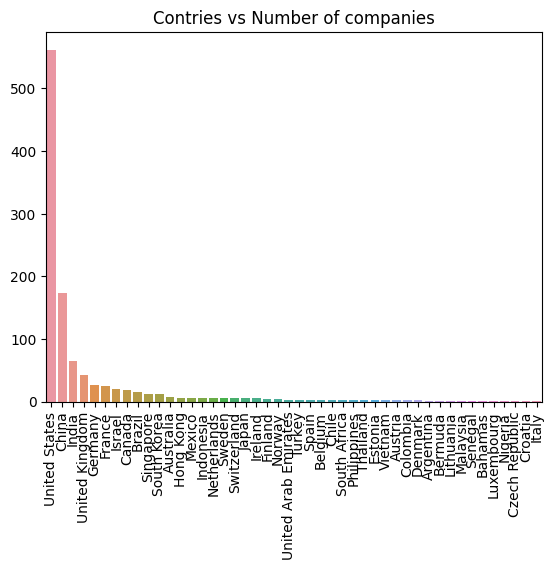

In [457]:
sp.barplot(x = contries,
            y = contries_count,
            data = df).set(title='Contries vs Number of companies')

# Show the plot
pt.xticks(rotation=90)
pt.show()

In [458]:
city=df['City'].value_counts().index
companypercity=df['City'].value_counts().values


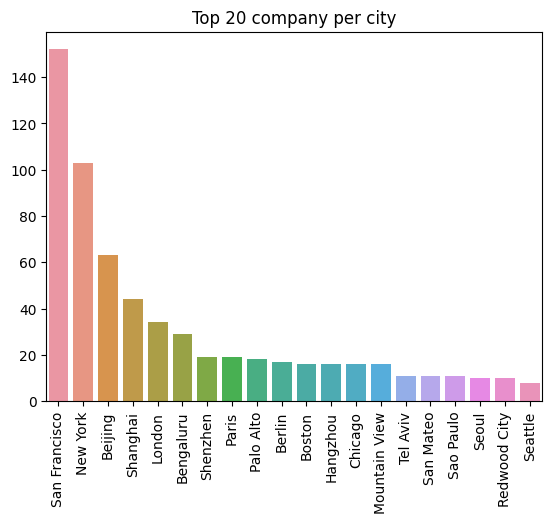

In [459]:
#Across the cities (Top 20):
sp.barplot(x = city[:20],
            y = companypercity[:20],
            data = df).set(title='Top 20 company per city')

# Show the plot
pt.xticks(rotation=90)
pt.show()

- The valuation sum per country

-- need to first convert the column valuation to a numeric data type

In [461]:
df['Valuation']=df['Valuation'].str[1:-1]

In [463]:
#now convert it to int type
df['Valuation'] = df['Valuation'].astype(int)

In [464]:
df_grouped=df.groupby(['Country/Region'], as_index=False).sum()

<ipython-input-464-1d22c1c1a837>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped=df.groupby(['Country/Region'], as_index=False).sum()


In [465]:
df_grouped=df_grouped.drop(['Year Founded','year_joined'],axis=1)

In [467]:
df_grouped.rename(columns = {'Valuation':'Total Valuation'}, inplace = True)

In [468]:
#Sorting the df_grouped in an accending order:
df_grouped=df_grouped.sort_values(by=['Total Valuation'], ascending=False)


- Finding missing values

In [470]:
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
year_joined          0
dtype: int64

In [471]:
[features for features in df.columns if df[features].isnull().sum()>0]

['City', 'Select Investors']

In [472]:
df['Select Investors'].isnull().sum()

1

In [473]:
df['City'].isnull().sum()

16

- Dataframe that contains only missing value

In [474]:
df_null=df[df.isnull().any(axis=1)]

In [475]:
df_null

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,year_joined
12,FTX,32,2021-07-20,fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021
170,HyalRoute,4,2020-05-26,mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020
242,Moglix,3,2021-05-17,e-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021
251,Trax,3,2019-07-22,artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019
325,Amber Group,3,2021-06-21,fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021
382,Ninja Van,2,2021-09-27,"supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021
541,Advance Intelligence Group,2,2021-09-23,artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021
629,LinkSure Network,1,2015-01-01,mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015
811,Carousell,1,2021-09-15,e-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021
848,Matrixport,1,2021-06-01,fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021


In [476]:
df_null.shape

(17, 11)

- Handling Missing Values

In [477]:
df_total=df.size

In [478]:
df_total

11814

In [479]:
count_dropna_rows = df.dropna().size
count_dropna_rows

11627

In [480]:
count_dropna_columns = df.dropna(axis=1).size
count_dropna_columns

9666

In [481]:
# Print the percentage of values removed by dropping rows,columns.

print('By Rows: ',count_dropna_rows/df_total*100)


print("By Columns: ",count_dropna_columns/df_total*100)

By Rows:  98.4171322160149
By Columns:  81.81818181818183


In [482]:
#the drop by row is better:
df=df.dropna()

### Identifing Outliers

In [483]:
#calculating the mean
mean=np.mean(df['Valuation'])
median=np.median(df['Valuation'])
print("The mean: ",mean)
#calculating the median
print("The median: ",median)

The mean:  3.455061494796594
The median:  2.0


In [484]:
if mean>median:
  print('The data more likely to be skewed to the RIGHT!')
else:
  print('The data more likely to be skewed to the LEFT!')

The data more likely to be skewed to the RIGHT!


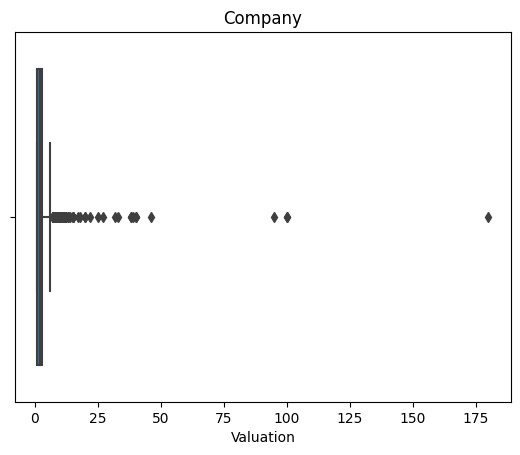

In [485]:
box = sp.boxplot(x=df['Valuation'])
g = pt.gca()
#box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
pt.xlabel('Valuation')
pt.title('Company');

In [486]:
print(df['Valuation'].max())
print(df['Valuation'].min())

180
1


In [487]:
# Calculate 25th percentile of annual strikes
percentile25 = df['Valuation'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df['Valuation'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Only care for the upper limit because we mentioned that the data is skewed to the right of the median
print('Upper limit is: ', upper_limit)

Upper limit is:  6.0


In [488]:
df_outlier=(df[df['Valuation'] > upper_limit])

In [489]:
df_outlier.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,year_joined
0,Bytedance,180,2017-04-07,artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,e-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [490]:
print('There are ', df_outlier.shape[0],' rows with a valuation greater than ',upper_limit)

There are  101  rows with a valuation greater than  6.0


In [491]:
#this is a way of making the dataset contain only values fall within the range of the lower and upper limits
#mask = (df['number_of_strikes'] >= lower_limit) & (df['number_of_strikes'] <=upper_limit)

#df = df[mask].copy()
#print(df)

--- in the case of our data, this is not considered as an outliers but we can think of it as the big comapnies with a valuation greater than the other in the dataset

#### Lable encoding to convert catogrical data type to a numeric values

In [492]:
#what column we have in the dataset do have catogry values?
df['Industry'].value_counts()

fintech                                218
internet software & services           203
e-commerce & direct-to-consumer        107
artificial intelligence                 82
health                                  74
other                                   58
supply chain, logistics, & delivery     56
cybersecurity                           50
data management & analytics             41
mobile & telecommunications             36
hardware                                34
auto & transportation                   31
edtech                                  28
consumer & retail                       25
travel                                  14
Name: Industry, dtype: int64

In [493]:
industry=list(df['Industry'].value_counts().index)

In [494]:
print("There are ", len(industry),' industry type in the data we have')

There are  15  industry type in the data we have


In [495]:
dfcopy=df

In [496]:
#make a new catogrical based on the valuation
dfcopy['Valuation_level']=pd.qcut(dfcopy['Valuation'],4, labels=['low','mid','high'], duplicates='drop')

In [498]:
dfcopy[dfcopy['Valuation_level']=='low']

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,year_joined,Valuation_level
355,1047 Games,2,2021-09-14,internet software & services,Zephyr Cove,United States,North America,2017,$127M,"VGames, Lakestar, Galaxy Interactive",2021,low
356,Baiwang,2,2019-03-25,fintech,Beijing,China,Asia,2015,$224M,"Guozhong Venture Capital Management, Shenzhen ...",2019,low
357,Boba,2,2022-04-05,fintech,San Francisco,United States,North America,2018,$45M,"DeFi Technologies, Hypersphere Ventures, M13",2022,low
358,Bought By Many,2,2021-06-01,fintech,London,United Kingdom,Europe,2012,$477M,"Octopus Ventures, Munich Re Ventures, CommerzV...",2021,low
359,Cambridge Mobile Telematics,2,2018-12-19,mobile & telecommunications,Cambridge,United States,North America,2010,$503M,SoftBank Group,2018,low
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,e-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017,low
1070,Zhuan Zhuan,1,2017-04-18,e-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017,low
1071,Zihaiguo,1,2021-05-06,consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,low
1072,Zopa,1,2021-10-19,fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021,low


In [499]:
dfcopy[dfcopy['Valuation_level']=='mid']

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,year_joined,Valuation_level
240,Dadi Cinema,3,2016-05-11,other,Shenzhen,China,Asia,2006,$154M,Alibaba Pictures Group,2016,mid
241,Kurly,3,2021-07-09,"supply chain, logistics, & delivery",Seoul,South Korea,Asia,2014,$770M,"Sequoia Capital China, DST Global, DST Global",2021,mid
243,OpenAI,3,2019-07-22,artificial intelligence,San Francisco,United States,North America,2015,$1B,Khosla Ventures,2019,mid
244,Upstox,3,2021-11-29,fintech,Mumbai,India,Asia,2010,$54M,"Tiger Global Management, Kalaari Capital",2021,mid
245,Vista Global,3,2017-08-23,other,Dubai,United Arab Emirates,Asia,2004,$418M,Rhone Capital,2017,mid
...,...,...,...,...,...,...,...,...,...,...,...,...
350,SouChe Holdings,3,2017-11-01,e-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,mid
351,TradingView,3,2021-10-14,fintech,Westerville,United States,North America,2011,$339M,"Tiger Global Management, Insight Partners, Jum...",2021,mid
352,Traveloka,3,2017-01-01,travel,Jakarta,Indonesia,Asia,2012,$1B,"Global Founders Capital, East Ventures, Expedi...",2017,mid
353,wefox,3,2019-03-05,fintech,Berlin,Germany,Europe,2014,$919M,"Salesforce Ventures, Seedcamp, OMERS Ventures",2019,mid


In [500]:
dfcopy['Valuation_level'].value_counts()

low     707
high    238
mid     112
Name: Valuation_level, dtype: int64

In [501]:
dfcopy['Valuation_level'].value_counts().values.sum()

1057

In [502]:
#convert the level to a code:
dfcopy['Valuation_level_code']=dfcopy['Valuation_level'].cat.codes


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,year_joined,Valuation_level,Valuation_level_code
0,Bytedance,180,2017-04-07,artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,high,2
1,SpaceX,100,2012-12-01,other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,high,2
2,SHEIN,100,2018-07-03,e-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,high,2
3,Stripe,95,2014-01-23,fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,high,2


In [503]:
dfcopy['Valuation_level_code'].value_counts()

0    707
2    238
1    112
Name: Valuation_level_code, dtype: int64

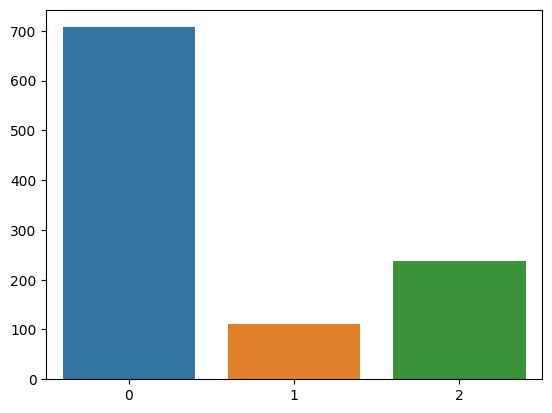

In [504]:
sp.barplot(x=dfcopy['Valuation_level_code'].value_counts().index, y=dfcopy['Valuation_level_code'].value_counts().values)
pt.show()

In [505]:
#Another catogories:

# Use qcut to divide Valuation into 'high' and 'low' Valuation groups
dfcopy['High Valuation'] = pd.qcut(df['Valuation'], 2, labels = ['No','Yes'])

# Convert High Valuation to numeric
dfcopy['High Valuation'] = dfcopy['High Valuation'].cat.codes

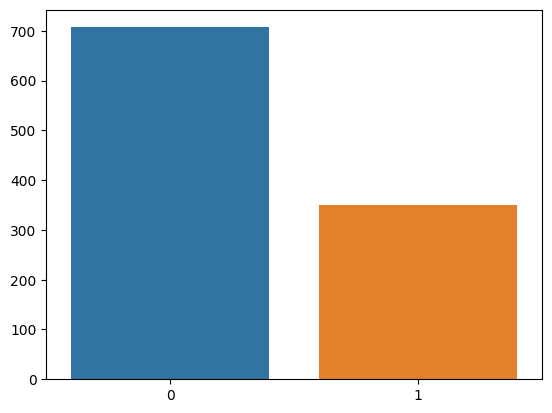

In [507]:
sp.barplot(x=dfcopy['High Valuation'].value_counts().index, y=dfcopy['High Valuation'].value_counts().values)
pt.show()

In [508]:
df.duplicated().sum()

0

In [509]:
df.isnull().sum()

Company                 0
Valuation               0
Date Joined             0
Industry                0
City                    0
Country/Region          0
Continent               0
Year Founded            0
Funding                 0
Select Investors        0
year_joined             0
Valuation_level         0
Valuation_level_code    0
High Valuation          0
dtype: int64

-- Convert Catogrical to Numerical data type
* `Valuation` - Label encoding was used because the labels are ordered.
* `Continent` - One hot encoding was used because there are few labels and they are not ordered.
* `Country/Region` - Label encoding was used because there are many labels, although they are not ordered.
* `Industry` - One hot encoding was used because there are few labels and they are not ordered.

In [511]:
df_onehot = pd.get_dummies(df['Continent'])

# add the one hot encoded columns to the original dataframe
df = pd.concat([df, df_onehot], axis=1)

In [512]:
df_onehot1 = pd.get_dummies(df['Industry'])

# add the one hot encoded columns to the original dataframe
df = pd.concat([df, df_onehot1], axis=1)

In [513]:
# Create numeric categoriews for Country/Region
#df['Country/Region'] = df['Country/Region'].astype('category').cat.codes

###  Results and evaluation and Insights

-
  The investor has asked you to provide them with the following data:

  - Companies in the hardware industry based in either Beijing, San Francisco, or London
  - Companies in the artificial intelligence industry based in London
  - A list of the top 20 countries sorted by sum of company valuations in each country, excluding United States, China, India, and United Kingdom
  - A global valuation map of all countries with companies that joined the list after 2020
  - A global valuation map of all countries except United States, China, India, and United Kingdom (a separate map for Europe is also required)
  Your dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent.

-- Companies in the hardware industry in either: Beijing, San Francisco, Londin

In [515]:
options = ['Beijing', 'London','San Francisco']

# selecting rows based on condition
hardware_df = df[(df['City'].isin(options)) & (df['hardware']==1)]

In [517]:
hardware_df.shape

(6, 35)

- Companies in the artificial intelligence industry based in London

In [518]:
ai_df = df[(df['City']=='London') & (df['artificial intelligence']==1)]

In [519]:
ai_df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,...,e-commerce & direct-to-consumer,edtech,fintech,hardware,health,internet software & services,mobile & telecommunications,other,"supply chain, logistics, & delivery",travel
873,BenevolentAI,1,2015-06-02,artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,...,0,0,0,0,0,0,0,0,0,0
1046,Tractable,1,2021-06-16,artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",...,0,0,0,0,0,0,0,0,0,0


- A list of the top 20 countries sorted by sum of company valuations in each country, excluding United States, China, India, and United Kingdom

In [520]:
df_grouped.head()

,Country/Region,Total Valuation
44,United States,1933
9,China,696
19,India,196
43,United Kingdom,195
17,Germany,72


- A global valuation map of all countries with companies that joined the list after 2020

In [541]:
a=df

In [542]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City',
       'Country/Region', 'Continent', 'Year Founded', 'Funding',
       'Select Investors', 'year_joined', 'Valuation_level',
       'Valuation_level_code', 'High Valuation', 'Africa', 'Asia', 'Europe',
       'North America', 'Oceania', 'South America', 'artificial intelligence',
       'auto & transportation', 'consumer & retail', 'cybersecurity',
       'data management & analytics', 'e-commerce & direct-to-consumer',
       'edtech', 'fintech', 'hardware', 'health',
       'internet software & services', 'mobile & telecommunications', 'other',
       'supply chain, logistics, & delivery', 'travel'],
      dtype='object')

In [543]:
a.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City',
       'Country/Region', 'Continent', 'Year Founded', 'Funding',
       'Select Investors', 'year_joined', 'Valuation_level',
       'Valuation_level_code', 'High Valuation', 'Africa', 'Asia', 'Europe',
       'North America', 'Oceania', 'South America', 'artificial intelligence',
       'auto & transportation', 'consumer & retail', 'cybersecurity',
       'data management & analytics', 'e-commerce & direct-to-consumer',
       'edtech', 'fintech', 'hardware', 'health',
       'internet software & services', 'mobile & telecommunications', 'other',
       'supply chain, logistics, & delivery', 'travel'],
      dtype='object')

In [544]:
a=a[a['year_joined']>2020]

In [547]:
a['year_joined'].value_counts()

2021    507
2022    116
Name: year_joined, dtype: int64

In [556]:
a= a[["Company", "Valuation",'Country/Region']]

In [557]:
a.head()

,Company,Valuation,Country/Region
16,J&T Express,20,Indonesia
18,Miro,18,United States
24,Blockchain.com,14,United Kingdom
27,OpenSea,13,United States
34,Getir,12,Turkey


In [558]:
glopal_val=a.groupby('Country/Region',as_index=False).sum('Valuation')

In [561]:

px.scatter_geo(glopal_val, locations='Country/Region', size='Valuation', locationmode='country names', color='Country/Region')


- A global valuation map of all countries except United States, China, India, and United Kingdom (a separate map for Europe is also required)


In [567]:
df_companies_sum_outliers_removed=df[~df['Country/Region'].isin(
    ['China', 'United States','India','United Kingdom'])]

In [568]:
# Plot the sum of valuations per country.

### YOUR CODE HERE ###

fig = px.scatter_geo(df_companies_sum_outliers_removed,
                     locations='Country/Region',
                     size='Valuation',
                     locationmode='country names',
                     color='Country/Region',
                     title='Global Unicorn Company Values')

# Show the plot.

### YOUR CODE HERE ###

fig.show()

In [569]:
# Update the figure layout.

### YOUR CODE HERE ###

fig.update_layout(
    title_text = 'Europe Unicorn Company Values', # Create a Title
    geo_scope='europe',  # Plot only the Europe instead of globe
)

# Show the plot again.

### YOUR CODE HERE ###

fig.show()

### Getting Insights

- A new column that calculate the difference between the founding and joining,
this gives us an idea that the fastest the company get into the list the fastest this company grow

In [576]:
df['time_to_join']=(df['year_joined'] - df['Year Founded'])

In [574]:
df['time_to_join'].min()

-4

In [579]:
df[(df['year_joined'] - df['Year Founded'])==-4]['year_joined']

714    2017
Name: year_joined, dtype: int64

In [582]:
#sorting the list of company by the time to join the list:
df=df.sort_values(by=['time_to_join'], ascending=True)


In [584]:
industry_top5=df['Industry'].head()

In [586]:
industry_top5=list(industry_top5)

In [587]:
industry_top5

['mobile & telecommunications',
 'auto & transportation',
 'e-commerce & direct-to-consumer',
 'artificial intelligence',
 'other']

In [588]:
industry_bot5=list(df['Industry'].tail())

In [589]:
industry_bot5

['other', 'health', 'consumer & retail', 'other', 'health']

In [594]:
#the year with most joining company:
year_joined=list(df['year_joined'].value_counts().index)
joins=list(df['year_joined'].value_counts().values)

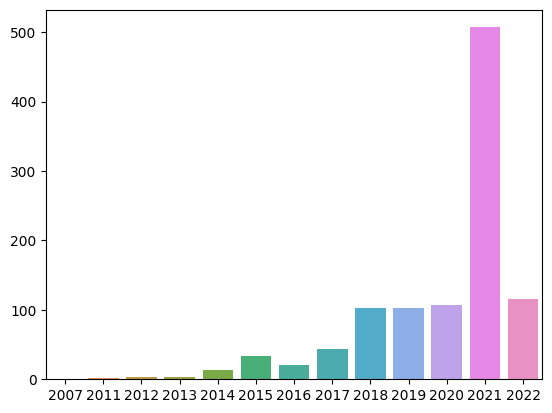

In [595]:
sp.barplot(x=year_joined,y=joins)
pt.show()

#Key insights:
- there is some error, there is a company founded in 2021 but joined the list in 2017
- top5 industry:
 1. 'mobile & telecommunications',
 2. 'auto & transportation',
 3. 'e-commerce & direct-to-consumer',
 4. 'artificial intelligence',
 5. 'other'
- Least 5 industry:
['health', 'consumer & retail', 'other', 'health']
- 2021 has the highest joining companies

Key Questions:
- what are the fastest 5 grow industry and what is the least 5?
- what year has the most joining?